In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
max_b=pd.read_csv('~D:/Vasiliev/PERMAK-A/nv/8d9d/max_cen_b.csv')
max_m=pd.read_csv('~D:/Vasiliev/PERMAK-A/nv/8d9d/max_cen_m.csv')
max_e=pd.read_csv('~D:/Vasiliev/PERMAK-A/nv/8d9d/max_cen_e.csv')
bad_state=19
_t = 'центральных (на периферии)'

In [3]:
def ExtractingMax(df):
    maxs=[]
    for i in range(1,100):
        df_1=df.query('state==@i');
        df_2=df_1.sort_values('kq');
        df_3=df_2.tail(20);
        #_tvs=df_2.tail(1).tvs;
        df_4=df_3.sort_values('dkr');
        maxs.append(df_4.tail(1));
    return maxs;
        
## Algorithm works well
def CalculateDeviations(_nominal, _deviated):
    dkr=[];
    for _state in pd.unique(_deviated.state):
        df=_deviated.query('state==@_state');
        df.index=np.arange(0,len(df),step=1);
        for i in range(len(df)):
            if (_nominal.tvs[i]==df.loc[i,'tvs']):
                
                kr1=_nominal.kr[i];
                kr2=df.loc[i,'kr'];
                dev=100*(kr2-kr1)/kr1;
                dkr.append(dev);
    return dkr;

def PlotDataFrame(_name,legend_prefix,df1,s):
    plt.figure(figsize=(12,10));
    bind=20;#np.arange(min(df1[_name]),max(df1[_name]),step=1);
    plt.grid(True);
    plt.xlabel('Всплески энерговыделения, %', fontsize=20);
    plt.ylabel('Частота', fontsize=20);
    plt.xticks(fontsize=16);
    plt.yticks(fontsize=16);
    percent=95
    quant = st.scoreatpercentile(df1[_name],percent)
    plt.hist(df1[_name],bind,label='{}, dkr(95%)={:.2f}'.format(legend_prefix,quant),alpha=0.5, color='blue');    
    plt.vlines(quant,0,5,color='red')
    plt.legend(fontsize=20);
    plt.title('Маскимальное отклоненение в энерговыделении {} твэлов'.format(s),fontsize=20);
    plt.show();
    

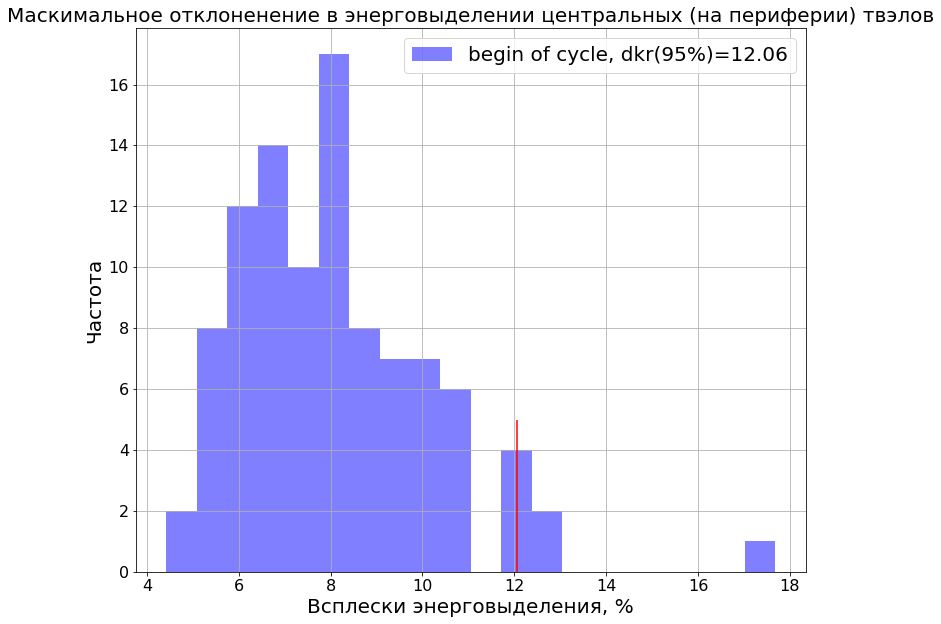

In [4]:
nom_b=max_b.query('state==0')
max_b=max_b.query('state!=0 & state!=@bad_state')
max_b['dkr']=CalculateDeviations(nom_b,max_b);
boc=ExtractingMax(max_b)
boc=pd.concat(boc[i] for i in range(len(boc)))
PlotDataFrame('dkr','begin of cycle',boc,_t)

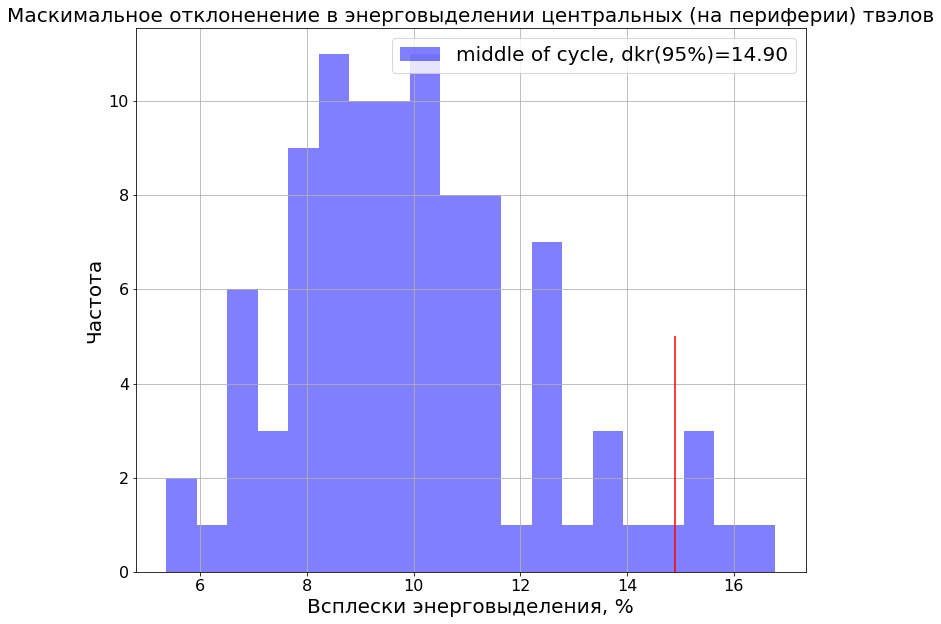

In [5]:
nom_m=max_m.query('state==0')
max_m=max_m.query('state!=0 & state!=@bad_state')
max_m['dkr']=CalculateDeviations(nom_m,max_m);
moc=ExtractingMax(max_m)
moc=pd.concat(moc[i] for i in range(len(moc)))
PlotDataFrame('dkr','middle of cycle',moc,_t)

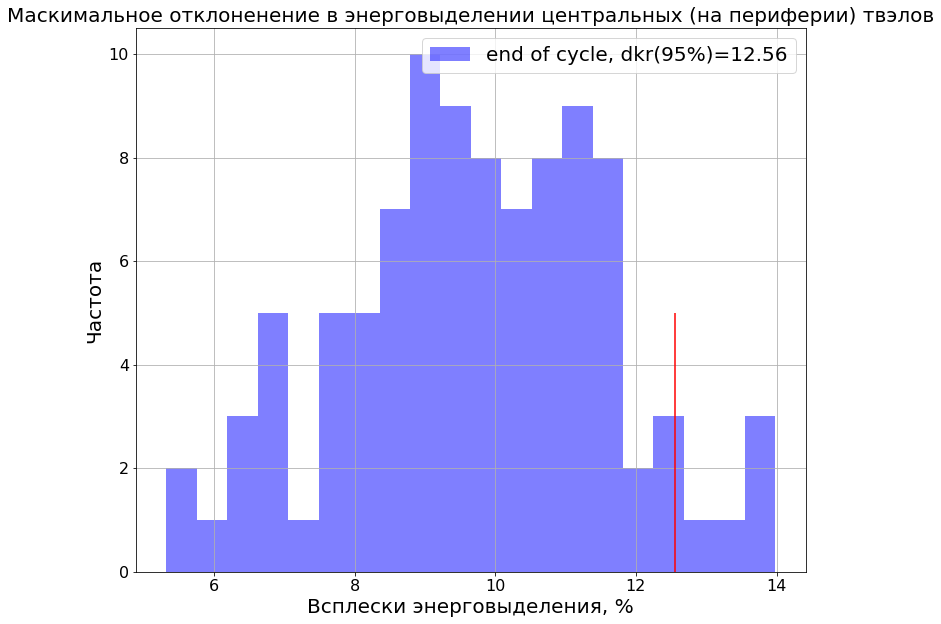

In [6]:
nom_e=max_e.query('state==0')
max_e=max_e.query('state!=0 & state!=@bad_state')
max_e['dkr']=CalculateDeviations(nom_e,max_e);
eoc=ExtractingMax(max_e)
eoc=pd.concat(eoc[i] for i in range(len(eoc)))
PlotDataFrame('dkr','end of cycle',eoc,_t)

In [7]:
print(boc.sort_values('dkr').tail(5), '\n')
print(moc.sort_values('dkr').tail(5), '\n')
print(eoc.sort_values('dkr').tail(5), '\n')

       tvs  tvel  time      kk  state     kq        kr        dkr
30725   68   327     0  1.0827     31  1.269  1.373946  12.115829
8364    91   277     0  1.0999      8  1.274  1.401273  12.303865
61741   22   287     0  1.1347     63  1.261  1.430857  12.508052
9000    34   277     0  1.1067      9  1.273  1.408829  12.605110
67079   96   327     0  1.2014     68  1.265  1.519771  17.680150 

       tvs  tvel  time      kk  state     kq        kr        dkr
79039  134   287    13  1.1702     80  1.287  1.506047  15.343274
54052   44   317    13  1.1483     55  1.285  1.475566  15.587462
50425   92   287    13  1.1800     51  1.277  1.506860  15.606679
36512   55   297    13  1.1864     37  1.267  1.503169  16.134071
46365   67   307    13  1.1499     47  1.270  1.460373  16.773490 

       tvs  tvel  time      kk  state     kq        kr        dkr
68218  123   317    25  1.0954     69  1.310  1.434974  13.081149
79645   72   287    25  1.1106     81  1.298  1.441559  13.293612
84292 